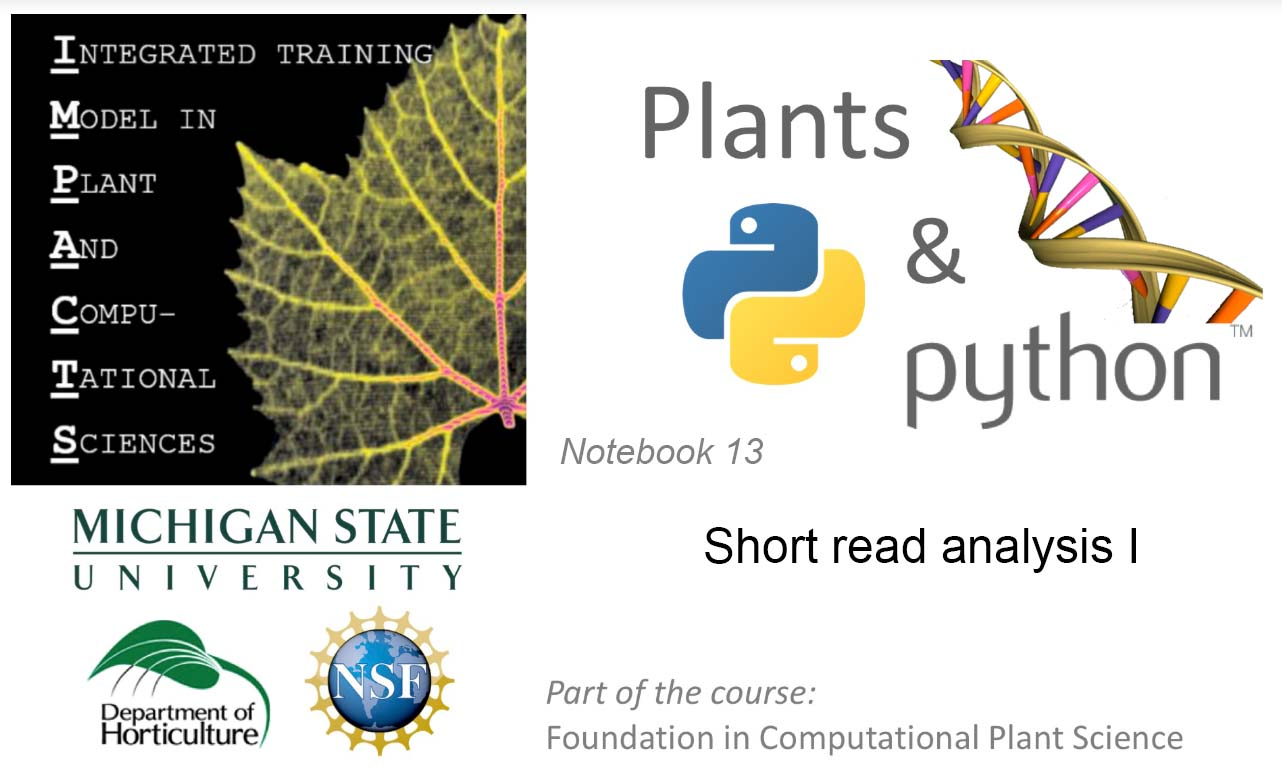

# A short introduction to short read analysis

Now that we have assembled a genome and have some idea of its content, we can use the genome as a foundation to quantify some biological datasets. We can get _billions_ of reads from a single Illumina run, and we can use these sequences to identify differences between a reference and some other plant or simply use the reads to count and quantify gene expression or other biological features. We can use sequence data to measure gene or small RNA expression (RNAseq or sRNAseq) and transcripts that are being transcribed into proteins (RiboSeq). We can also look at epigenetic changes such as methylation (bisultife-seq), chromatin modifications (ChIPseq), or chromatin accessibility and conformation (ATACseq, HiC). There are many different ‘-seqs’, and maybe someday you can create _your own_ '-seq' to measure increasingly narrow things. At the base of analyzing all of these datasets is aligning the raw data to the genome. We can do this the ‘old fashioned’ (circa 2010) way where we  align the reads with base pair precision to the genome and store this information (similar to our in class assignment). Or, we can quasi or pseduo align the reads and get a _rough_ estimate ofwhere the read maps to. There are pros and cons to both approaches which we will discuss below. 
Today we will go over how to access short read Illumina data, how to align/map RNAseq data, and a basic way to assess experimental quality using principle component analysis. We will continue this analysis in the next two class periods where you will analyze large-scale RNAseq experiments and we will run differential gene expression and network co-expression analyses. 

The basic principle of RNAseq analysis is to use the number of reads that align to different genes in the genome as a proxy of how much those genes are expressed. RNAseq libraries are made from random messenger RNAs with low bias, so the pool of sequences is a good representation of what's being expressed in that tissue at that timepoint. There are different types of RNAseq libraries, but here we will focus on the most common approach where mRNA is enriched using poly T beads, reverse transcribed into DNA, framgented, and ligated to adapters for sequencing. 
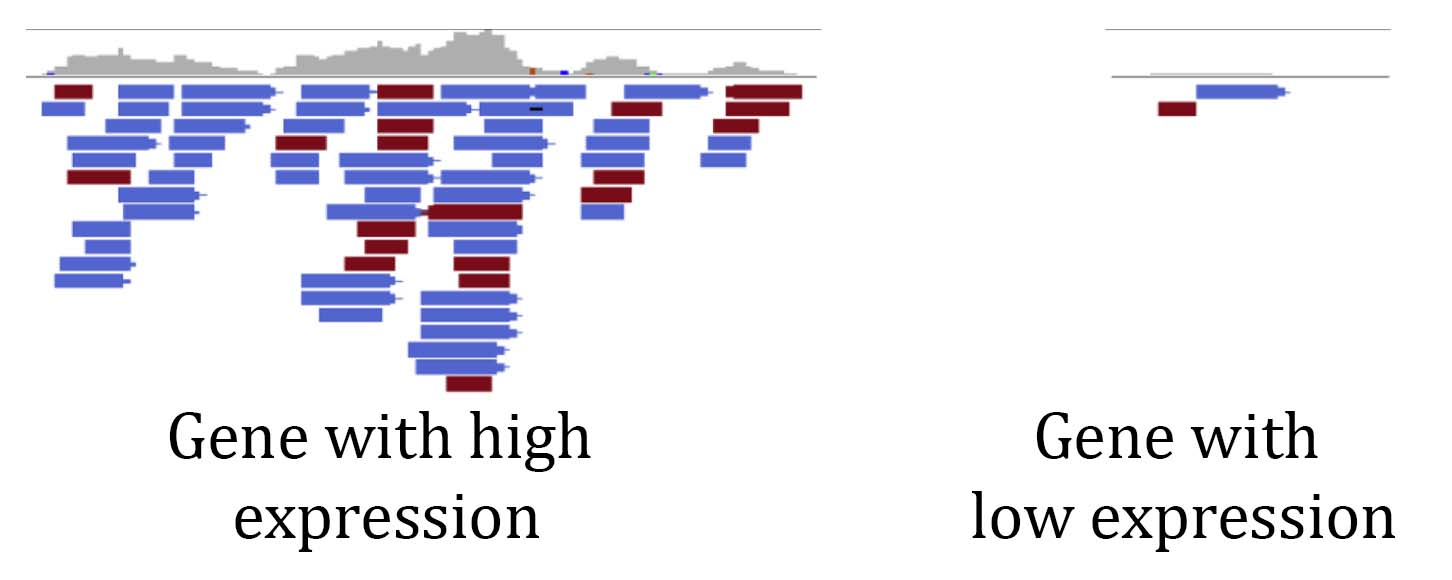

___

# Downloading data from the NCBI Sequence Read Archive (SRA)

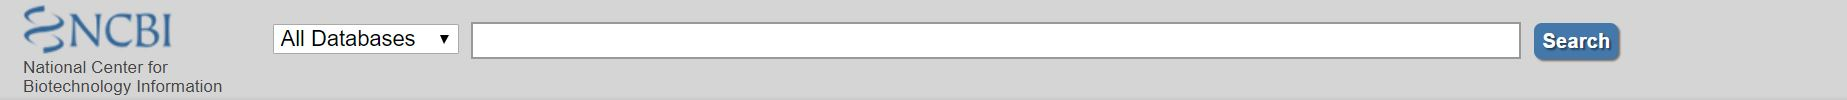

The National Center for Biotechnology Information (NCBI) maintains a massive database, the Sequence Read Archive (SRA) filled with next generation and third generation sequencing data: <br>
https://www.ncbi.nlm.nih.gov/sra <br>
The SRA has petabytes ( >1,000,000,000,000,000 base pairs) of raw data from many of the living and some extinct species on Earth.  You can put your favorite species in the search bar at the top and see if there are any sequences available. Some of the SRA data has been extensively mined, but most of it has only been analyzed _superficially_. There are over 30,000 RNAseq samples for Arabidopsis and ~16,000 for maize on the SRA. Some of this data is defintley low quality, but most was probably carefully collected. What additional insights could be gained my analyzing ALL THE DATA using a common framework? What can be discovered from reanalyzing comparable datasets from many species at once? The SRA is a rich treasure trove of data, and it's free to use. Most journals require that sequencing data from published papers should be deposited in a public repository like the SRA, so keep this in mind. We can download data from the SRA directly to hpcc. 
<br>
What is the format for short read sequencing data? We are familiar with the .fasta format of sequence data, and short read Illumina data has a similar format that builds in quality scores. 
<br>
Most Illumina data you will encounter is stored in a .fastq format as shown below: <br>

    @SRR1620941.1 AMELIA:320:C2J1FACXX:3:1101:1504:2233 length=202
    CTGGGATGTTTGGGCGGCTTCAGATCTGTGGAGTTCGACTCCCTGCATGAGCACCCGGGCTCCTCGCTTGAGAGGCGATC
    GTGGTCGCTCACAGCCTCGCCCGACGCCTCCGCTGCCGAGGGATGGGTGGACGAGCTCCGGCGGCTGCGCGTCGCCGAGC
    TCCGTCGCGACGTCGAGCGATGCGATCTCTCTATCGGGACGC
    +SRR1620941.1 AMELIA:320:C2J1FACXX:3:1101:1504:2233 length=202
    B@@FFDDFHHHFHJJJJJJJJJJIJJJIJJJJJHHGIGGIIIJHHHHHFFFFFEDDDDCDDDDCDDDDDDBCDDD@<9@D
    BCBDDDDBDDDDDCBBCDBD<+=BDFFFFHHHHHJJJJIJJIGGHJJGIJIJJGJHFEHFFCDDDDDDD8BDDBDDDBBB
    DCCDABDDDDDDBDD@BBB>ABDDBDD@CDCCCCCBBD<BB>
    @SRR1620941.2 AMELIA:320:C2J1FACXX:3:1101:2085:2106 length=202
    CCTGCTTCGCTGCCTGGACTGCCAGCGCCGCTGCTTCCTCTGCAGCCTTCAGGCGTGCAGCCCGGCTGGGGAAGTCGCCC
    AGCTCTCCTTCGCTGGTTCCCCTTCCCTACACATGTCGACCTCTGCTGAGCGCGCTGCCAGGCTCAAGGCCAAGGGAACC
    AGCGAAGGAGAGCTGGGCGACTTCCCCAGCCGGGCTGCACGC
    +SRR1620941.2 AMELIA:320:C2J1FACXX:3:1101:2085:2106 length=202
    CCCFFFFFHHHHHIGIJGIIJJJJJJJJGIJJJIIJHJJJJJJJJIBGIEA?EADFDDDDEDBDBBDDDDDDDDCC@5?@
    BB?CCDDDCCDBDDD>A@CC@+=BFFFFFHHHHHJJJJIJJIJJIIJJJJJIIIIIJIIJIJIIJIEHIJHHHHFFFFDD
    CDDDDDDDBDBDDDDDDDD9BBDDADDDBDBBBBDDDDDDDD
 <br>
1. The first line (starting with @SRR...) is a unique identifier for that read. Remember, experiments can have billions of reads, so the names/identifiers can be quite long. <br>
2. The second line (starting with ATG...) is the actual sequence. This is the bit we care most about. <br>
3. The third line (starting with +SRR...) is the same unique identifier for that read. <br>
4. The fourth line (seemingly random characters) contains the quality scores. Each letter, symbol, or number corresponds to a sequence position. The sequences and quality scores will always have the same number of characters. During sequencing, the Illumina machine will asign a quality score for each base pair based on how confident the base call was. Some clusters that are close together can have mixed signals and as the Illiumina run progresses, reagents wear down and quality scores tend to be lower. We can use these quality scores to remove 'bad' bases and during read alignment. 


We will use the SRA-Toolkit program to download data from the SRA. The SRA toolkit is installed on HPCC and can be accessed by loading the module from a developmental node or in a submission script. Simply type: <br>

    $module load sra-toolkit`

We can then download the data using the following command: <br>

    $fastq-dump SRR1620942 
    
**Note:** You need to specify the output directory (`--outdir <path>`) or the reads will be downloaded by default into your present working directory. The SRR number can be found at the bottom left hand corner of the info page for that sample: 
<br>

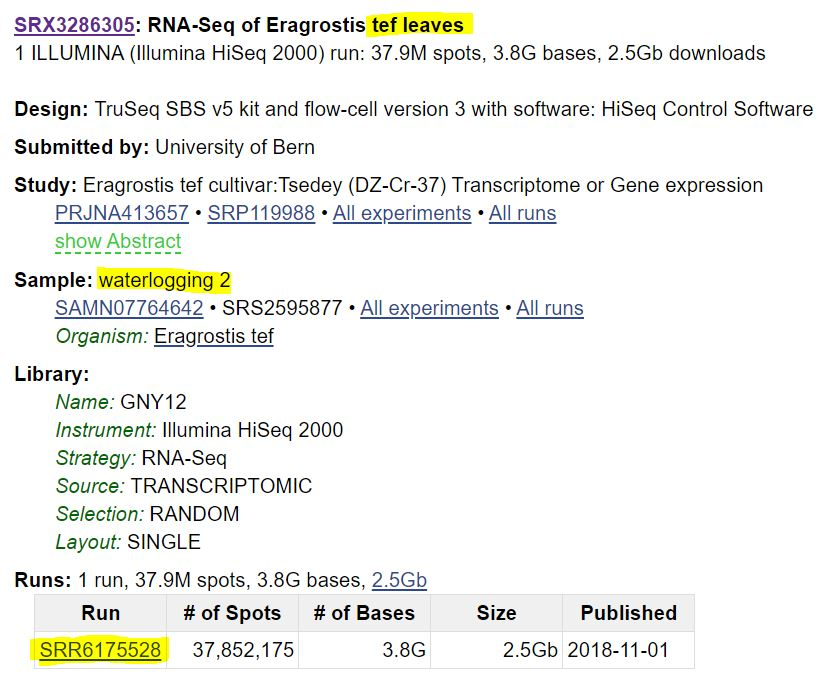
<br>
Because fastq files can get quite large, raw sequences should be downloaded into scratch (`/mnt/scratch/MSU_ID/`) <br>
If the data is paired end, you can split it into Read 1 and Read one by using the split flag as follows: <br>

    $fastq-dump --split-3 SRR1620942 <br>
It is also useful to rename the files from the default SRR number into something more informative (i.e. species name, tissue type, sample, treatment, etc). 

This approach is fine when downloading a few files, but what if we want to download _a lot_ of .fastq files? We could recursively run each sample one at a time, but that would take ages and be a poor use of our time. Instead, we can write a simple shell script and list to download a batch of files as follows: <br>
    
    #!/usr/bin/bash
    fastq-dump $1
<br>
Where $1 sets the first argument in command line.  
<br>
Then, we can create a list of SRA identifiers for the files we wantwith one identifier per line as follows: <br>

    SRR1620941
    SRR940286
    SRR940284
    SRR940283
    SRR940276
    SRR940278
    SRR940279
    SRR1620975
    SRR1620976
    SRR1620977
<br>
We can then read this list and feed it into our shell script to download the files recursively `|` connects the <br>

    $cat list_SRA.txt | xargs -n 1 bash get_SRR_data.sh
    

### Trimming Illumina reads

Before we work with fastq files, we need to clean them up and trim off any adapters or low quality bases. Running alignments on untrimmed data usually results in low quality mapping. Again, there are many programs that can do this, but my favorite is a relatively new program that is _ultra fast_: `fastp`. It will automatically detect the Illumina adapters that were used, and trims all low quality bases without needing to apply manual filters. Fastp is realtively easy to run, and it just requires the input fastq (`-i`) and the name of the new trimmed output file you want to generate (`-o`): <br>

      $/mnt/research/HRT891_f19/bin/fastp/fastp -i maize_seed_R1.fastq -o maize_seed_R1_trimmed.fastq

**Note:** Remember to trim your reads before aligment. 

**Before class on Wednesday, find some RNAseq data on the SRA, and download it to `/scratch`. It can be paired end or single end, and it can be from the same experiment or several different ones. Also, try to find at least 6 different timepoints, tissue types, etc. For example, you could download 6 'leaf' expression datasets from maize and see how similar they actually are. You could re-analyze data from drought, pathogens, mutants, developmental series, etc. You can also use your own data. This can be done individually or in groups, it's totally up to you.**

### Which species did you choose and which timepoints. Why did you choose this? 

In [ ]:
## Answer

# RNAseq data analysis: read alignment

There is no _correct_ way to analyze gene expression data but there are a few best practices that produce the most robust, accurate results. There are forks at every major step including how the reads are aligned/mapped against the genome, how we identify genes that are differentially expressed, and the types of downstream analyses we conduct with the data. In this notebook we will focus on: (1) how to quantify gene expression data, (2) how to manipulate an expression-based data frame, (3) and how we can assess the quality of the data prior to downstream analyses. We will work on analyzing the expression data in the next notebook. <br>
In our raw fastq file, we have fragments of sequenced mRNAs and we want to know which genes they came from. We can do this by **aligning** or **mapping** the reads against the genome to figure out the exact base pair overlap of the reads and the genome, or we can **pseudo-align** or **quasi-map** the reads to figure out which gene the reads map to without calculating the best alignment. These two approaches produce *largely* the same results, but have unique advantages and disadvantages. <br>
Allignment based algorithms are more computationally intensive. These algorithms use a hash table to figure out which region in the genome the reads correspond to and then test local alignments to find the best overlap between the genome and reads. Alignemnt based programs produces a huge `.sam` files which contain the seqeunce information from the read and where it align in the genome. A `.sam` file is essential for doing variant analyses and for quantifying alternative splicing, but it is not needed to quantify gene expression. Alignment of RNAseq data is also challenging because the genome sequence contains both the introns and exons, and RNAseq reads contain only exons (introns are spliced out). A single read can map to several distant regions in the genome. There are several leading alignment based programs for RNAseq including HISAT2 and STAR (among many others, don't @ me!): <br>
HISAT2: <br>
http://ccb.jhu.edu/software/hisat2/index.shtml
STAR: <br>
https://github.com/alexdobin/STAR
<br>
Pseudoalignment or quasi-mapping based programs work a little differently. Instead of figuring out the optimal alignment and exact overlap between a read and the genome, these programs use a hash table to figure out which transcript the read is from without doing the computationally intensive alignment. Pseudoaligners use the gene models (or transcripts) as a reference for alignment instead of the genome, so they don't run into problems associated with splicing. Instead of producing an alignment file (`.sam`), pseudoaligners output a table with counts for each gene. Pseudoaligners run _ultra fast_ and can process a stardard RNAseq sample in a few minutes (compared to hours for true aligners). There are a few good pseudoaligners and the two most popular are kallisto and Salmon: <br>
kallisto: <br>
https://pachterlab.github.io/kallisto/
<br>
Salmon: <br>
https://combine-lab.github.io/salmon/ <br>

We will use Salmon in the course, but other programs might be better for your experimental system. In this lession we will be using RNAseq data from a few tissues in maize. In the second part, you can use whatever data you'd like. <br>
<br>
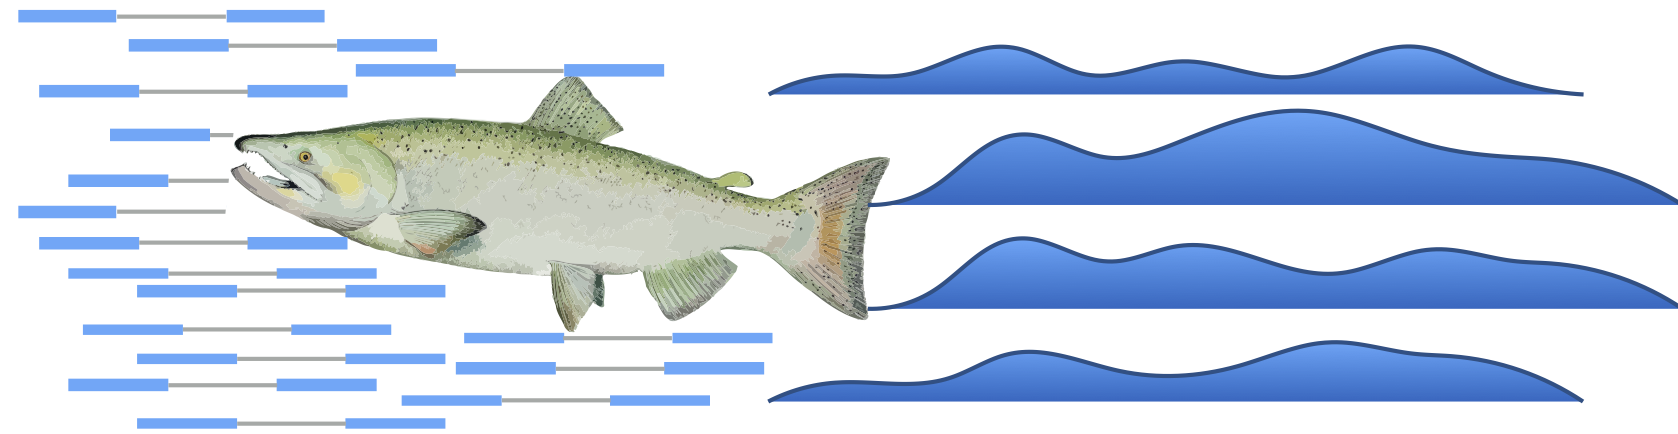
<br>


To run Salmon we need an indexed file of transcripts (to map the reads against) and either unpaired or paired Illumina .fastq files. Salmon is installed on HPCC, and we can run it by loading the Salmon module: <br>

    $module load Salmon
<br>
First, we need to build our index. The index is a structure that Salmon uses to quasi-map RNA-seq reads during quantification. The index only needs to be constructed once per transcriptome, and it can then be reused to quantify many experiments. If you don't have a set of transcripts (transcriptome) you need to download one for your favorite genome. We can get this from several places including ensembl: 
http://ensemblgenomes.org/info/genomes?division=4 <br>
We can use the `wget` command on HPCC to download a file directly from a link. Note: The file will be downloaded automatically in your present working directory: <br>  

    $wget ftp://ftp.ensemblgenomes.org/pub/release-45/plants/fasta/zea_mays/cds/Zea_mays.B73_RefGen_v4.cds.all.fa.gz
<br>

We can then use the `index` command of Salmon to build our index for mapping, where the `-t` flag specifies the transcript file and `-i` specifies the directory and prefix for the index you will be building: <br>

    $salmon index -t Zea_mays.B73_RefGen_v4.cds.all.fa -i Zea_mays_Salmon_index
    
After we have an index, we can run the `quant` function to quantify expression. We will set a few flags as follows. `-i` sets the index `-r` sets the path to the fastq file (if the data is unpaired). `-1` and `-2` set the path for read 1 and read 2 for paired end data. `-p` sets the number of threads to use and `-o` sets the output directory: <br>

    $salmon quant -i Zea_mays_Salmon_index/ -l A -r /mnt/research/HRT891_f19/Week_3_RNAseq/00_raw_RNAseq_data/01_maize/maize_root_R1_trimmed.fastq -p 5 -o test_2
    
This should run in a few minutes, and we can enter the output directory to find the files we need. The files we care about are the `/log/salmon_quant.log` and `quant.sf` files. The log file contains all the info and metrics from the run and the `.sf` file contains the read counts for each gene. Read counts are important, but these can be misleading because longer genes will be fragmented into more pieces per single mRNA molecule, and might appear to have higher expression. Two genes with similar expression levels could have different read counts if one gene is significanlty larger. The numer of reads per gene (transcript) is also dependent on the total number of reads sequenced for each library.  We can normalize the data by the number of reads per library and the lengths of transcripts to create a metric of **transcripts per million (TPM)**. This normalization will allow us to compare the expression pattern of the same gene across multiple tissues/timepoints.  


### Question: What is the read mapping percentage of this sample? Do you think this is good? What factors could be driving this mapping rate?

In [ ]:
## Answer


We can run individual `quant` commands for each file separately, but this is tedious, especially if we have thousands of RNAseq files. We can use a shell script to run them all automatically. Below is an example shell script to do this: <br>

    #!/bin/bash

    module load salmon

    cd /mnt/research/VanBuren_Lab/Bob/Teaching/RNAseq/

    for i in /mnt/research/HRT891_f19/Week_3_RNAseq/00_raw_RNAseq_data/01_maize/*.fastq
    do

    unpaired=$(echo ${i})
    Name=$(echo ${i} | sed 's/\/mnt\/research\/RT891_f19\/Week_3_RNAseq\/00_raw_RNAseq_data\/01_maize\///'| sed 's/.fastq//')
    echo ${i}
    # Run salmon command followed by done to end the loop
    salmon quant -l a -p 6 -r ${unpaired} -i /mnt/research/HRT891_f19/Week_3_RNAseq/01_genome_files_indexes/Zea_mays_Salmon_index/  -o ${Name}_quant
    echo ${Name} & done


We can follow the logic of shell scripts based on what we know about variables and loops in python. Here, we are running a `for` loop on all of the fastq files within a directory. Shell loops require three elements: for, do, and done. We will set two variables, one to retrieve the reads and one to set the output prefix. Instead of print, we will use echo. For the `Name` variable, echo will print to full path of the file, and we can use `sed` to remove all of the charactors we don't want. <br>
You can save this shell script with the file extension `.sh` and run it on a developmental node (or submit it to the queue via Slurm): <br>

    $bash kallisto_quant_script.sh


Our shell sript will process all of the files individually, but we want all of the data in the same dataframe. We could write a script to parse each separate dataframe, rename the columns and merge them, but luckily for us, the Salmon function `quantmerge`exists to do this: 

     salmon quantmerge --quants *_quant -o merged TPM

We need to specify the directories that we want to merge using the `--quants` flag. Using `*` matches zero or more random charactors and will include any directories that end in "quant" `-o` specifies the prefix of the merged TPM file. 

**Note:** You can run this shell script on the maize data if you want, but you really only need to run this on the data you download from the SRA. 

# Data import and exploration

Now that we have a matrix of TPMs for a couple samples, we are ready to analyze the data for differential gene expression, co-expression networks, and other downstream analyses. But first, we need to import the data and we should test for variance between our replicates. We have three replicates for the maize data (described above) and the teff data (included with this notebook). For the teff data, we have 10 diverse tissues with three replicates. If the data were collected carefully we would expect a low amount of variance between the replicates. If the data was collected haphazardly or mishandled, we would expect a high degree of distance in the PCA. If the replicates have a high amount of variance this will effect the downstream analyses. We can explore the RNAseq data using principal component analysis (PCA). We can use the same code from Notebook 10 with a few modifications. <br>
First, we need to import out table of TPMs as a dataframe:

In [ ]:
import numpy as np
import pandas as pd

expr_df = pd.read_csv('data/tef_raw_TPM.txt')
expr_df = expr_df.set_index(expr_df.columns[0])
expr_df.head()

**Question:** How many Genes are there in this species and how many different RNAseq libraries were sequenced? 

In [ ]:
## Answer

We have a lot of individual data points here (e.g. genes) for doing a PCA, but some are more informative than others. If you look through the data you will see that lots of genes have no or very little expression. These genes would have TPMs of 0 or >5. Since these data points are not informative, we can mask them before moving on: 

In [ ]:
## Filter out non-expressed genes
expr_df = expr_df.loc[expr_df.sum(axis=1) > 10, :]
expr_df.shape

## Filter out lowly expressed genes
mask_low_vals = (expr_df > 1).sum(axis=1) > 10
expr_df = expr_df.loc[mask_low_vals, :]

expr_df.shape

TPMs range by several orders of magnitude and a highly expressed gene can have a TMP of > 10,000! If we include values ranging from 1-10,000 in the same data frame, this would skew the PCA. Instead we can log2 transform the data to get numbers that are more reasonable. Note that some genes have 0 expression and log transformation of 0 is undefined. Even though we should have filtered these out, we can add 1 to every value. We can then use the numpy function `np.log` to log transform the values. We will use two loops to do this: 

In [ ]:
for c in [c for c in expr_df.columns if np.issubdtype(expr_df[c].dtype , np.number)]:
    expr_df[c] += 1

for c in [c for c in expr_df.columns if np.issubdtype(expr_df[c].dtype , np.number)]:
    expr_df[c] = np.log(expr_df[c])

Now our data is in the same order of magnitude and we're ready to run the PCA. See the transformed values: 

In [ ]:
expr_df.head()

If we run the PCA on the data frame as is, we would get ~30,000 points, one for each gene. Lets transpose the data so run the PCA on the 31 samples: 

In [ ]:
expr_df_trans = expr_df.transpose()

In [ ]:
expr_df_trans.head()

Lets run the PCA using the code from notebook 10 with some modifications and lets see how much variation our two PCs capture. **Note:** This is a complex data frame that we heavily transformed, so this might not be super high. 

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

real_PCs = pca.fit_transform(expr_df_trans)
real_PCs_df = pd.DataFrame(data = real_PCs, columns = ['PC1', 'PC2'])

In [ ]:
pca.explained_variance_ratio_

Now we just need to add back the sample names into a single data frame and plot the two PCs. We can do this using the old data frame, but here I just concatenated a new data frame containing just the sample names: **Bonus:** see if you can figure out how to pull this data out from the original data frame. 

In [ ]:
sample_names = pd.read_csv('data/tef_names.txt')

In [ ]:
final_real_df = pd.concat([sample_names, real_PCs_df], axis = 1)
final_real_df.head()

Finally, we can use `seaborn` to plot the PCs. We can set the colors using `hue`

In [ ]:
import seaborn as sns
sns.lmplot('PC1', 'PC2', height=10, data=final_real_df, hue='Tissue', fit_reg=False)

**Question:** How does the data distribution look? Are the replicates clustering together for each tissue type/ timepoint or not? 

In [ ]:
## Answers

# Putting it all together

So, we learned how to pull data from the SRA, quantify gene expression, and do some basic quality checks. Now, the task for this notebook is to run this pipeline on a set of RNAseq data you find on the SRA. You should document what you did, but at the end of the notebook, I would like to see a _nice_ plot of the PCA of your experimental data(s) with informative labels for the samples. We will use this data in the next notebook. 

In [ ]:
## Answers